## The intent of this notebook it to prove to reconstructibility of a job time series from an event-based decomposition 

#### 1) For 1 time serie (bytesWritten)

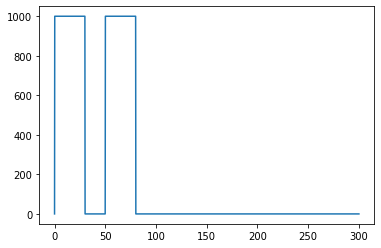

30.0
30.0
total volume w0= 29909.96998999667
total volume w1= 30010.003334444824


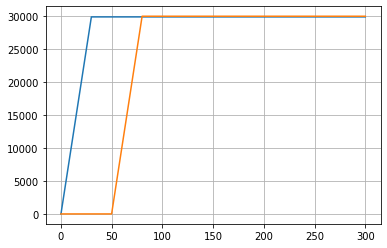

100.03334444814939
100.03334444814939


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

def rect(x):
    return np.where(abs(x)<0.5, 1, 0)
ts = 5 # sampling interval in seconds
ti = [0, 20, 40, 60] # 4 events
wi = [30e3, 30e3, 200e3, 100e3] # bytes of data written for each event
bi = [1e3]*len(ti) # 1kB/s the transfer rate at which each event is written

t = np.linspace(0, ti[-1]*ts, 3000)
dt = np.diff(t)[0]
tau0 = wi[0]/bi[0]
tau1 = wi[1]/bi[1]
w0 = bi[0]*rect((t-ti[0]-tau0/2)/tau0)
w1 = bi[1]*rect((t-ti[1]-tau0-tau1/2)/tau1)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(t, w0+w1)
plt.show()
print(tau0)
print(tau1)
print(f'total volume w0= {integrate.trapz(w0, t)}')
print(f'total volume w1= {integrate.trapz(w1, t)}')
c_w0 = np.insert(integrate.cumtrapz(w0, t), 0, 0)
c_w1 = np.insert(integrate.cumtrapz(w1, t), 0, 0)
corr0 = np.sum(dt*np.abs(np.diff(w0)))/2
corr1 = np.sum(dt*np.abs(np.diff(w1)))/2
c_w = dt*np.abs(np.diff(np.insert(w0, 0, 0)))/2
plt.plot(t, c_w0)
plt.plot(t, c_w1)
plt.grid(True)
plt.show()
corr = np.sum(dt*np.abs(np.diff(w0)))/2
c_w = dt*np.abs(np.diff(np.insert(w0, 0, 0)))/2
print(np.sum(c_w))
print(corr)
#print(f'total volume = {np.trapz(w0+c_w, x=t)}')
#print(f'total volume = {integrate.simps(w0, t)}')
#print(f'with correction : {corr + np.trapz(w0, x=t)}')
integration_error = np.mean(w0)*len(t)/(np.max(t))
#print(integration_error)#print(wi[0] - integration_error)

#### 2) Predicting end of job given t_i, w_i and b_i.

In [2]:
lag =  ts*np.diff(np.insert(np.array([ti]), 0, 0))
print(lag)
duration = np.sum((np.array(wi)/np.array(bi)) + lag)
'''for i in range(len(ti)):
    tau = wi[i]/bi[i]
    duration += tau + ti[i]*ts
    lag = ti[i]-'''
print(duration)


[  0 100 100 100]
660.0


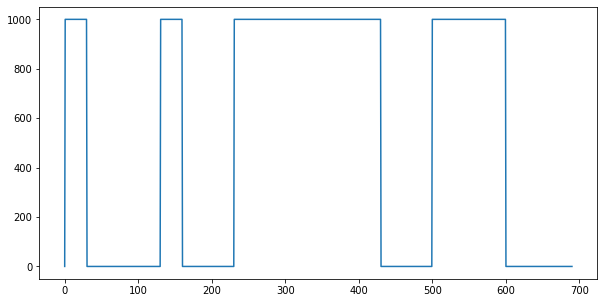

IO time span is [ 30.  30. 200. 100.]
total volume should be 360000.0 ans is 359159.15915915905


In [3]:
t = np.linspace(0, 690, 1000)
w = np.zeros(shape=t.shape)
lag = 0
tau = 0
for i in range(len(ti)):
    tau = wi[i]/bi[i]
    w += bi[i]*rect((t-ti[i]*ts-lag-tau/2)/tau)
    lag = tau
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(t, w)
plt.show()
print(f'IO time span is {np.array(wi)/np.array(bi)}')
print(f'total volume should be {np.sum(wi)} ans is {np.trapz(w, x=t)}')
integration_error = np.mean(w)*len(t)/(np.max(t))

4.375
total volume = 59619.873291097036
total volume = 59979.99333111037
total volume = 59653.21773924642
total volume = 59983.32777592531


/home_nfs/mimounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


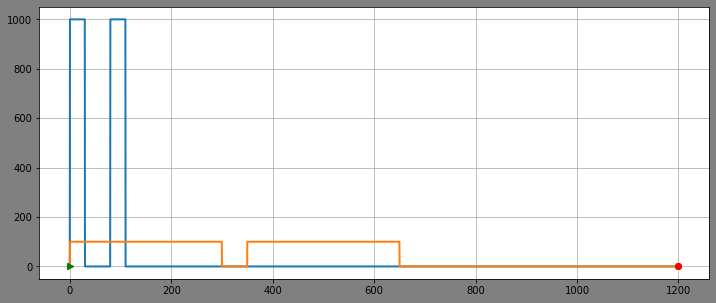

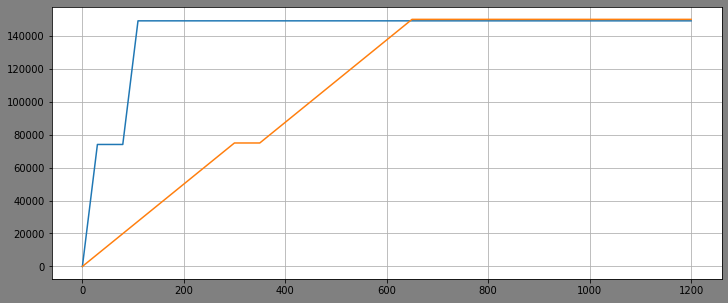

In [4]:
from scipy import integrate
ts = 5 # sampling interval in seconds
ti = [0, 10, 20] # 4 events
wi = [30e3, 30e3, 0] # bytes of data written for each event
bi = [1e3]*len(ti)

def job_duration(ti, wi, bi, ts):
    lag =  ts*np.diff(np.insert(np.array([ti]), 0, 0))
    return np.sum((np.array(wi)/np.array(bi)) + lag)

def ts_job(ti, wi, bi, ts, expand=None):
    if expand is None:
        expand = job_duration(ti, wi, bi, ts)
        print(f'duration = {expand}s')
    t = np.linspace(0, expand, 3000)
    w = np.zeros(shape=t.shape)
    lag = 0
    tau = 0
    for i in range(len(ti)):
        tau = wi[i]/bi[i]
        w += bi[i]*rect((t-ti[i]*ts-lag-tau/2)/tau)
        lag = tau
    return t, w

def ts_plot(t, w, label=None):
    plt.rcParams["figure.figsize"] = (12,5)
    plt.rcParams['figure.facecolor'] = 'gray'
    plt.plot(t, w, lw=2, label=label)
    plt.plot(t[0], w[0], '>g')
    plt.plot(t[-1], w[-1], 'or')
    plt.grid(True)
    

job1 = (ti, wi, bi) # on BB
job2 = (ti, wi, [x/10 for x in bi]) # on PFS
speedup = job_duration(*job1,ts)/job_duration(*job2, ts)
print(1/speedup)
t, w1 = ts_job(*job1, ts, expand = 1200) 
t, w2 = ts_job(*job2, ts, expand = 1200) 
ts_plot(t, w1)
ts_plot(t, w2)
plt.grid(True)
plt.show()
plt.grid(True)
plt.plot(t, np.cumsum(w1))
plt.plot(t, np.cumsum(w2))
plt.show()
print(f'total volume = {np.trapz(w1, x=t)}')
print(f'total volume = {np.trapz(w2, x=t)}')
print(f'total volume = {integrate.simps(w1, t)}')
print(f'total volume = {integrate.simps(w2, t)}')

duration = 660.0s
duration = 620.0s
PFS duration = 660.0s
BB duration = 620.0s
Speedup = 1.064516129032258


/home_nfs/mimounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home_nfs/mimounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home_nfs/mimounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


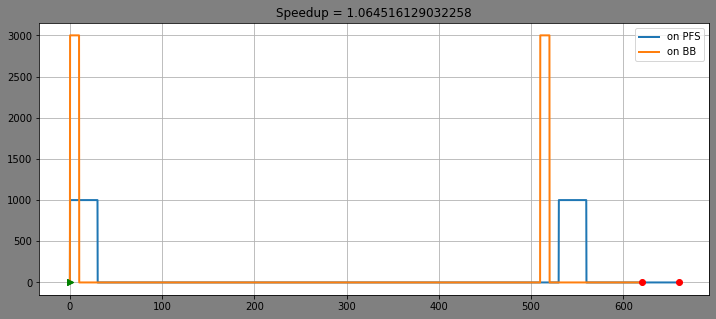

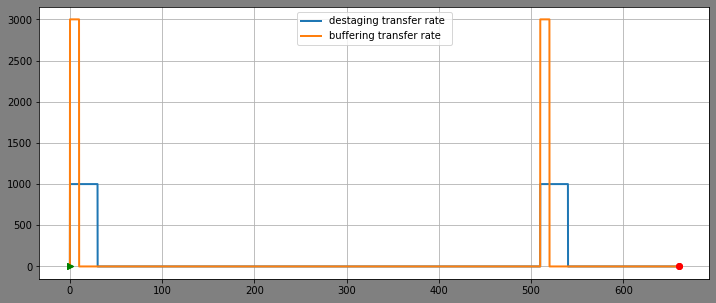

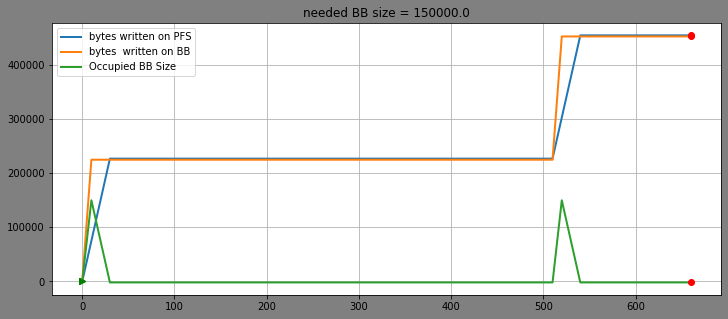

In [5]:
ts = 5 # sampling interval in seconds
ti = [0, 100, 120] # 4 events
wi = [30e3, 30e3, 0] # bytes of data written for each event
di = [1, 1, 1] # destaging schedule for this job (continuous destaging here)
bi = [1e3]*len(ti)
Bi = [3e3]*len(ti)
t1, w1 = ts_job(ti, wi, bi, ts)
t2, w2 = ts_job(ti, wi, Bi, ts)


def ts_job_with_destage(ti, wi, Bi, bi, di, ts):
    ebi = [b*d for b,d in zip(bi, di)]
    pfs_duration= job_duration(ti, wi, bi, ts)
    bb_duration= job_duration(ti, wi, Bi, ts)
    print(f'PFS duration = {pfs_duration}s')
    print(f'BB duration = {bb_duration}s')
    print(f'Speedup = {pfs_duration/bb_duration}')
    t = np.linspace(0, pfs_duration, 5000)
    W = np.zeros(shape=t.shape)
    w = np.zeros(shape=t.shape)
    lagb = 0
    lagB = 0
    # volume of data to destage
    w0 = 0
    for i in range(len(ti)):
        if di[i]==0: # no destage
            taub = pfs_duration
            # data debt
            w0 += wi[i]
        else: # destaging order
            # all data in destaging transfer
            taub = (wi[i] + w0)/(ebi[i])
            # resetting data debt
            #w0 -= wi[i]
            w0 = 0
        tauB = wi[i]/Bi[i]
        # writing in BB at rate Bi
        W += Bi[i]*rect((t-ti[i]*ts-lagB-tauB/2)/tauB)
        # destaging in PFS at rate di[i]*bi[i]
        w += ebi[i]*rect((t-ti[i]*ts-lagB-taub/2)/taub)
        
        
        lagb = taub
        lagB = tauB
    return t, w, W

speedup = job_duration(ti, wi, bi,ts)/job_duration(ti, wi, Bi, ts)
ts_plot(t1, (w1), label = 'on PFS')
ts_plot(t2, (w2), label = 'on BB')
plt.legend()
plt.title(f'Speedup = {speedup}')
plt.show()
t, w, W = ts_job_with_destage(ti, wi, Bi, bi, di, ts)
ts_plot(t, w, label = "destaging transfer rate ")
ts_plot(t, W, label = "buffering transfer rate")
plt.legend()
plt.show()
ts_plot(t, np.cumsum(w), label = "bytes written on PFS")
ts_plot(t, np.cumsum(W), label = "bytes  written on BB")
ts_plot(t, np.cumsum(W-w), label = "Occupied BB Size")
plt.legend()
plt.title(f'needed BB size = {np.max(np.cumsum(W-w))}')
plt.show()
